# Random Graphs and Trees


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random


%timeit nx.erdos_renyi_graph(1000, 0.1)

129 ms ± 5.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


NetworkXError: Graph is not weighted.

{(0, 1): Text(-0.14627448048381714, -0.75167216478896, '8'),
 (0, 4): Text(0.09834741527314937, -0.7056018559022267, '3'),
 (1, 3): Text(-0.21472802152375436, -0.16247054032099323, '7'),
 (1, 4): Text(0.06494785313172392, -0.4572740206911867, '8'),
 (2, 3): Text(-0.5097665604468403, 0.38007698599658307, '4'),
 (2, 6): Text(-0.27595526116060254, 0.3571125068206707, '1'),
 (3, 5): Text(0.006039861617826867, 0.4595154835797804, '4'),
 (3, 6): Text(-0.01597070113602829, 0.15543876976002124, '7'),
 (4, 7): Text(0.4161898800265925, -0.06495582561149119, '7'),
 (5, 7): Text(0.3923358674112073, 0.5109598894025491, '7'),
 (6, 7): Text(0.37032530465735214, 0.2068831755827899, '6')}

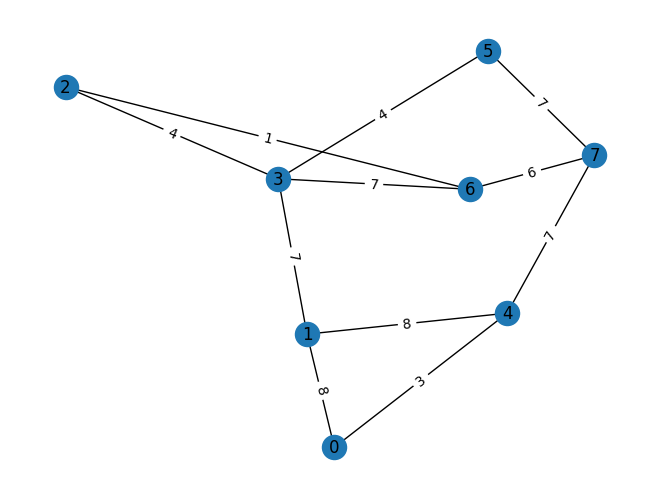

In [2]:

# generate random weighted graph
G = nx.gnp_random_graph(8, 0.3, seed=1, directed=False)
for u, v in G.edges():
    G.edges[u, v]['weight'] = random.randint(1, 10)

# draw the graph with edge labels
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
# nx.draw(G, with_labels=True)

In [22]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter), root

9


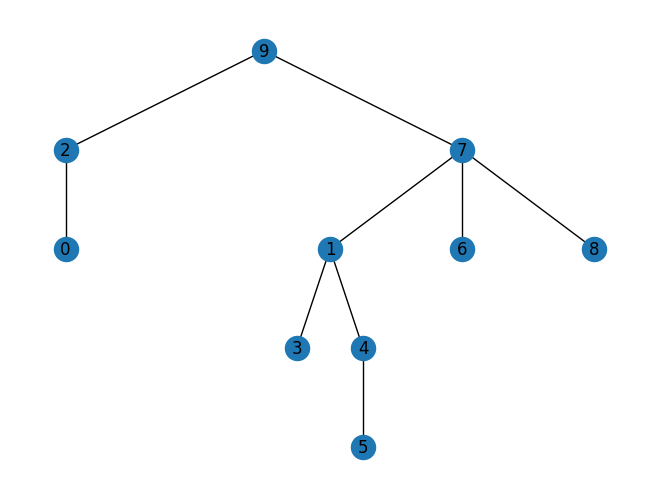

In [67]:
# generate random tree
T = nx.random_tree(10, seed=1)
# draw the tree
pos, root = hierarchy_pos(T)
nx.draw(T, pos, with_labels=True) 

print(root)

{9: 0, 2: 1, 7: 1, 0: 2, 1: 2, 6: 2, 8: 2, 3: 3, 4: 3, 5: 4}


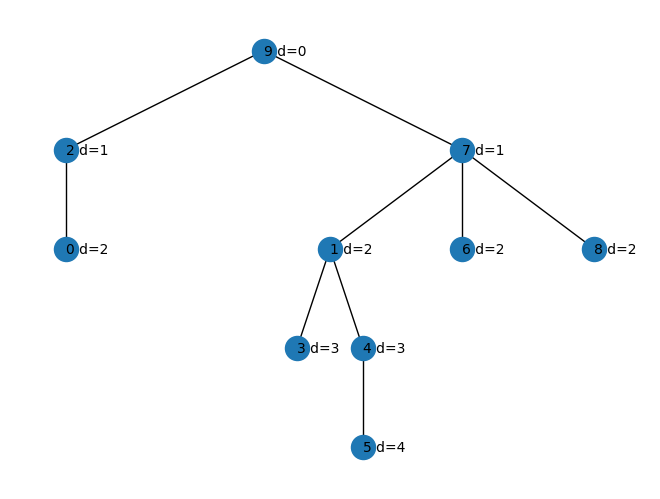

In [68]:
# draw the tree with depths labels
nx.draw(T, pos, with_labels=False) 
d = nx.shortest_path_length(T, root)
print(d)
for n in d:
    x, y = pos[n]
    # text colored black
    plt.text(x, y, '%s d=%d' % (n, d[n]), ha='left', va='center', color='black') 
    

In [69]:
depths_from_root = nx.shortest_path_length(T,root)
print("depths from root = ", depths_from_root)
height= max(depths_from_root.values())
print("height = ", height)

arity = max([len(list(T.neighbors(n))) - 1 if n != root else len(list(T.neighbors(n))) for n in T.nodes()])
print("arity = ", arity)

depths from root =  {9: 0, 2: 1, 7: 1, 0: 2, 1: 2, 6: 2, 8: 2, 3: 3, 4: 3, 5: 4}
height =  4
arity =  3


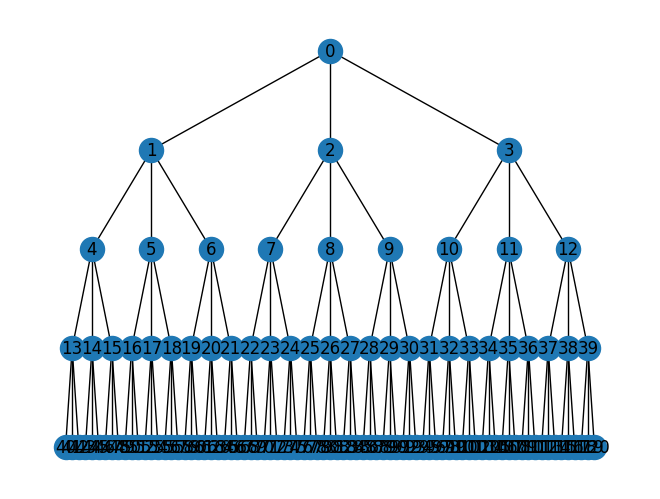

In [71]:
perfectly_balanced_T = nx.balanced_tree(arity, height)

# draw the tree
pos, root = hierarchy_pos(perfectly_balanced_T, 0)
nx.draw(perfectly_balanced_T, pos, with_labels=True) 

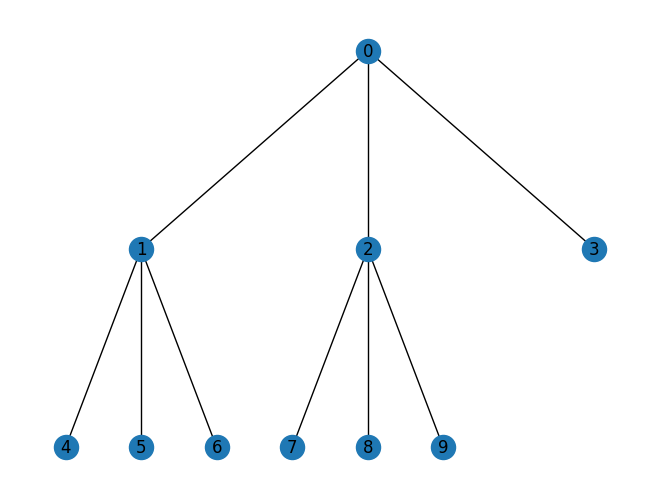

In [72]:
full_rary_T = nx.full_rary_tree(arity, len(T.nodes()))

# draw the tree
pos, root = hierarchy_pos(full_rary_T, 0)
nx.draw(full_rary_T, pos, with_labels=True) 